In [1]:
!pip install yfinance
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 74.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 11.7 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd

In [23]:
gme = yf.Ticker("GME")
gme_stock = gme.history(period="max")
gme_stock.reset_index(inplace=True)
gme_stock.to_csv("gme_stock_data.csv", index=False)
gme_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
telsa = yf.Ticker("TSLA")
tesla_stock = telsa.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock.to_csv("tesla_stock_data.csv", index=False)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [33]:
from bs4 import BeautifulSoup
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "Tesla Annual Revenue(Millions of US $)" in table.get_text():
        revenue_table = table
        break
rows = revenue_table.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()    
    data.append([year, revenue])
tesla_revenue = pd.DataFrame(data, columns=["Year", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue['Year'] = tesla_revenue['Year'].astype(int)
tesla_revenue.tail()

,Year,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "GameStop Annual Revenue(Millions of US $)" in table.get_text():
        revenue_table = table
        break
rows = revenue_table.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()    
    data.append([year, revenue])
gme_revenue = pd.DataFrame(data, columns=["Year", "Revenue"])
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue['Year'] = gme_revenue['Year'].astype(int)
gme_revenue.tail()

,Year,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [37]:
def make_graph(stock_data, revenue_data, stock):
    # Create subplots with shared x-axes
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3
    )

    # Filter stock data and revenue data for specific dates
    stock_data_specific = stock_data[stock_data.Date >= '2009-01-01']
    revenue_data_specific = revenue_data[revenue_data.Year >= 2009]

    # Add stock price trace (plot the Close price)
    fig.add_trace(
        go.Scatter(x=stock_data_specific['Date'], y=stock_data_specific['Close'], name="Share Price"),
        row=1, col=1
    )

    # Add revenue trace
    fig.add_trace(
        go.Scatter(x=revenue_data_specific['Year'], y=revenue_data_specific['Revenue'], name="Revenue"),
        row=2, col=1
    )

    # Update X and Y axes labels
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Year", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    # Update layout
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )

    # Show the graph
    fig.show()

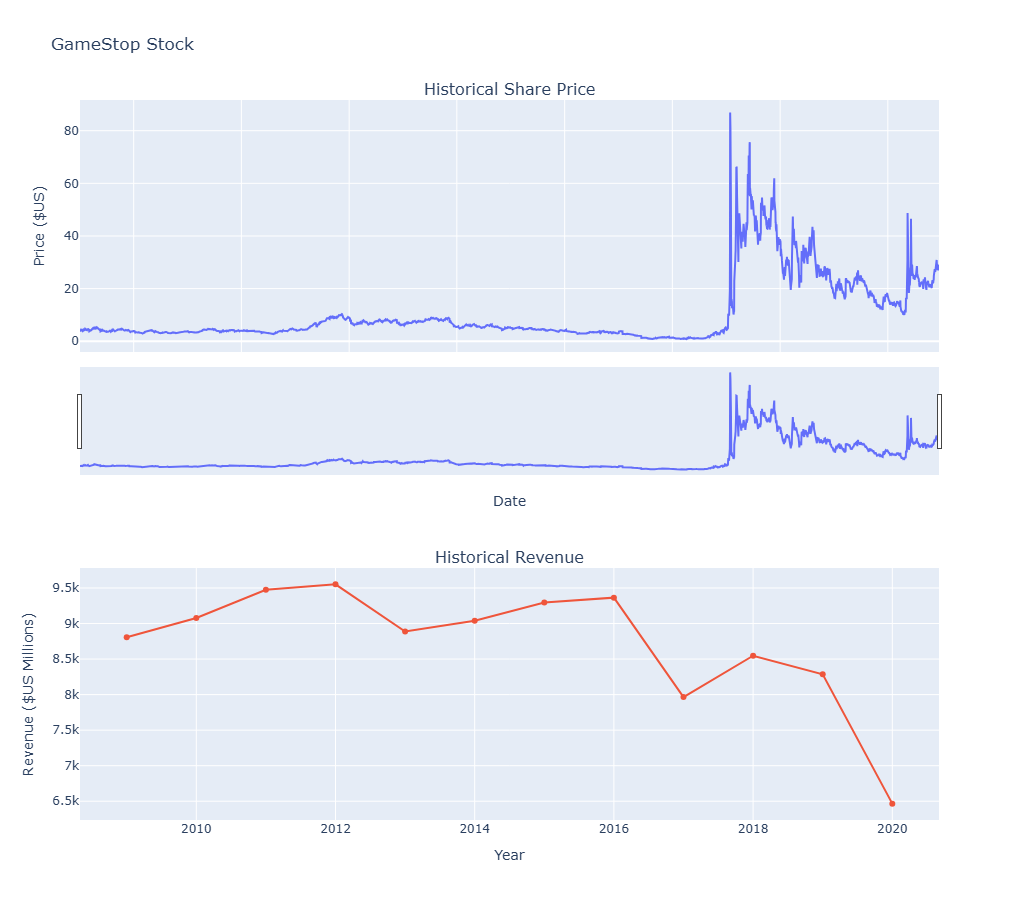

In [38]:
make_graph(gme_stock, gme_revenue, "GameStop Stock")

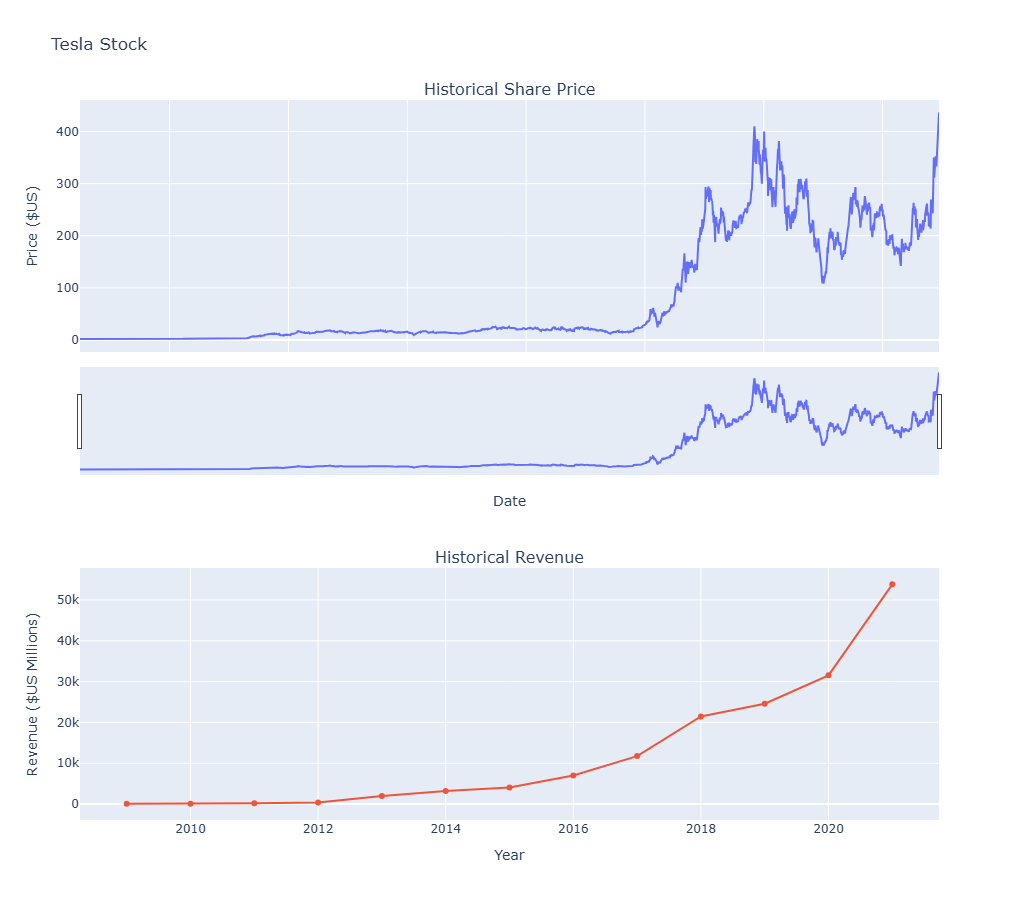

In [39]:
make_graph(tesla_stock, tesla_revenue, "Tesla Stock")